In [2]:
import sys
import pandas as pd
import numpy as np
import mglearn
import sklearn
import matplotlib.pyplot as plt

# Categorical Variables
- discrete variables; non-contiguous


## One-Hot-Encoding (Dummy Variables)
- most common way to represent categorical variables
- can be one-hot-encoding or one-out of-N encoding, dummy variables
- these newly constructed features are then 0 or 1
    - make sense in the formula for linear binary classification (and others)
    - represent any number of categories by introducing one new feature per category
- can be created using either *pandas* or *scikit-learn*


In [3]:
import pandas as pd

data = pd.read_csv(
    "../data/adult.data", header=None, index_col=False,
    names=['age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'martial-status', 'occupation', 'relationship','race', 'gender',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'])

data = data[['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']]

data.head()


,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


### Checking string-encoded categorical data
- first check if a column actually contains meaningful cateforical data
- preprocessing may be required to obtain a fixed set of categories (eg human input could include variable spellings or understandings)


In [4]:
print(data.gender.value_counts())

 Male      21790
 Female    10771
Name: gender, dtype: int64


- simple way to encode in *pandas* is using the *get_dummies* function
- this automatically transforms all columns that have object types (like strings) or are categorical (special pandas concept)

In [5]:
print("Original features: \n", list(data.columns), "\n")
data_dummies = pd.get_dummies(data)
print("Feaure after get_dummies:\n", list(data_dummies.columns))

Original features: 
 ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income'] 

Feaure after get_dummies:
 ['age', 'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'education_ 10th', 'education_ 11th', 'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th', 'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm', 'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate', 'education_ HS-grad', 'education_ Masters', 'education_ Preschool', 'education_ Prof-school', 'education_ Some-college', 'gender_ Female', 'gender_ Male', 'occupation_ ?', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-in

In [6]:
data_dummies.head()

,age,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,workclass_ State-gov,...,occupation_ Machine-op-inspct,occupation_ Other-service,occupation_ Priv-house-serv,occupation_ Prof-specialty,occupation_ Protective-serv,occupation_ Sales,occupation_ Tech-support,occupation_ Transport-moving,income_ <=50K,income_ >50K
0,39,40,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,50,13,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,38,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,53,40,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,28,40,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [7]:
features = data_dummies.loc[:, 'age':'occupation_ Transport-moving']
# Extract NumPy arrays
X = features.values
y = data_dummies['income_ >50K'].values
print("X.shape: {}, y.shape: {}".format(X.shape, y.shape))

X.shape: (32561, 44), y.shape: (32561,)


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
logreg = LogisticRegression(solver='sag')
logreg.fit(X_train, y_train)
print("Test score: {:.2f}".format(logreg.score(X_test, y_test)))

Test score: 0.81


/home/friend/.local/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:328: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


## Numbers Can Encode Categoricals
- the categories could be encoded as numberical representations depending on storage techniques or data collection techniques, which could present the variable as continuous rather than categorical
- categorical features are often encoded this way using integers
- pandas' *get_dummies* function treats all numbers as continuous and will not create dummy variables for them. 
- alternative is to use OneHotEncoder of scikit-learn


In [9]:
# creata a DataFrame with an integer feature and a categorical string feature
demo_df = pd.DataFrame({'Integer Feature':[ 0,1,2,1],
    'Categorical Feature': ['socks', 'fox', 'socks', 'box']})
demo_df

,Integer Feature,Categorical Feature
0,0,socks
1,1,fox
2,2,socks
3,1,box


In [10]:
# demonstration that get_dummies treats the integers as a continuous feature
pd.get_dummies(demo_df)

,Integer Feature,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,0,0,0,1
1,1,0,1,0
2,2,0,0,1
3,1,1,0,0


In [11]:
# create dummy variables for the "Integer Feature" column
#  explicity list the columns you want to encode using the columns parameter
demo_df['Integer Feature'] = demo_df['Integer Feature'].astype(str)
pd.get_dummies(demo_df, columns = ['Integer Feature', 'Categorical Feature'])

,Integer Feature_0,Integer Feature_1,Integer Feature_2,Categorical Feature_box,Categorical Feature_fox,Categorical Feature_socks
0,1,0,0,0,0,1
1,0,1,0,0,1,0
2,0,0,1,0,0,1
3,0,1,0,1,0,0


## Univariate Nonlinear Transformations

- in addition to adding polynomial features to help linear models, we can apply other mathematical functions like *log*, *exp*, or *sin*
- unlike tree-models, which care more about the ordering of the features, linear models and neural networks are tied to scale and distribution of each feature
    - regression has a difficult time otherwise with nonlinear relations between features and target
- *log* and *exp* can help by adjusting the relative scales in the data to be better captured by linear models and neural networks
- *sin* and *cos* deal with data that encodes periodic patterns
- models work best when each feature is loosely Gaussian distributed. log and exp is a hacky but simple and efficient way to achieve this form


In [31]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000,3))
w = rnd.normal(size=3)

X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [34]:
print("Number of feature appearances:\n{}".format(np.bincount(X[:,0])))


Number of feature appearances:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Value')

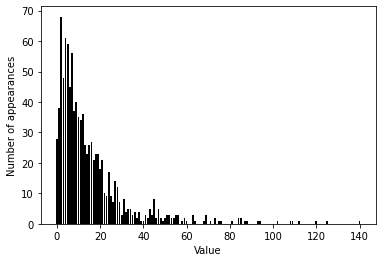

In [36]:
bins = np.bincount(X[:,0])
plt.bar(range(len(bins)), bins, color='k')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [37]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Test score: {:.3f}".format(score))

Test score: 0.622


In [38]:
# use log(X+1) rather than log(X) due to the occurence of 0 in the dataset features and log(0) is undefined
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Value')

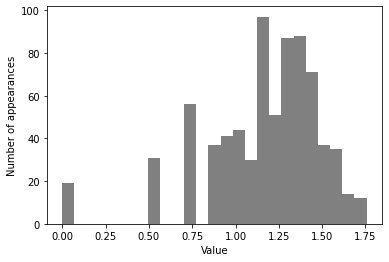

In [39]:
plt.hist(np.log(X_train_log[:,0] + 1), bins=25, color='gray')
plt.ylabel("Number of appearances")
plt.xlabel("Value")

In [40]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Test score: {:.3}".format(score))

Test score: 0.875


---
## Automatic Feature Selection

- increasing the feature dimensionality makes all models more complex, and therefore increases the chance of overfitting.
- to help generalize results, when dealing with high-dimensional datasets in general it can be a good idea to reduce the number of features to only the most useful ones, and discard the rest.
- three basic strategies (for supervised learning) of identifying good features:
1. univariate statistics
2. model-based selection
3. iterative selection


### Univariate Statistics
- we compute whether there is a statistically significant relationship between each feature and the target
- the features that are related with the highest confidence are selected
- with classification, this is known as ANOVA (*analysis of variance*)
- important property of these test is that they are *univariate*, meaning that they only consider each feature individually
    - it is important to acknowledge that a feature will be discarded if it is only informative when combined with another feature
- univariate tests are often very fast to compute and don't require building a model
- the tests are completely independent of the model that will use them

- Scikit-learn univariate feature selection tests include
1. *f_classif* for classification
2. *f_regression* for regression
- there includes a method to discard features based on the *p*-values determined in the test
    - all the methods here to discard features use a threshold to discard all features with too high a *p*-value
- simplest method on how to compute this threshold is *SelectKBest*, which select a fixed number *k*  of the features
- *SelectPercentile*, selects a fixed percentage of features